# Des Données sur les Accidents de la route 

## Partie Exploration de données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install pygal_maps_fr

!pip install folium

import pygal
from IPython.display import SVG, display

import folium
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns

#### Importation du DataFrame nettoyé "_accident_" contenant les informations utiles pour chaque accident


In [2]:
%store -r accident_share

data_accident = accident_share.copy()
data_accident

,Num_Acc,nbv,prof,surf,autoroute,route_departementale,route_nationale,voie_communales,circ_a_chaussees_separees,circ_a_sens_unique,...,vehic_voiture,obsm_vehicule,obsm_pieton,obsm_animal,choc_avant,choc_arriere,choc_cote,pas_manv_evitement,manv_evitement,Sens_Circu_Identique
0,201900000001,0,0,0,1,0,0,0,1,0,...,1,1,0,0,1,1,0,0,2,1
1,201900000002,1,1,0,1,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,201900000003,0,0,0,1,0,0,0,1,0,...,3,2,0,0,1,2,0,2,1,1
3,201900000004,0,0,0,1,0,0,0,1,0,...,3,3,0,0,1,2,0,1,2,1
4,201900000005,0,0,0,1,0,0,0,0,1,...,2,2,0,0,0,2,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58835,201900058836,0,0,1,1,0,0,0,0,1,...,2,2,0,0,1,1,0,0,1,1
58836,201900058837,1,0,1,1,0,0,0,0,1,...,3,3,0,0,2,1,0,3,0,1
58837,201900058838,0,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,1
58838,201900058839,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,1


In [3]:
data_accident.columns

Index(['Num_Acc', 'nbv', 'prof', 'surf', 'autoroute', 'route_departementale',
       'route_nationale', 'voie_communales', 'circ_a_chaussees_separees',
       'circ_a_sens_unique', 'circ_bidirectionnelle', 'vma_moins_de_50',
       'vma_50_90', 'vma_90_110', 'vma_110_130', 'vma_plus_de_130', 'lum',
       'agg', 'int', 'atm', 'col', 'reg_N', 'reg_S', 'reg_OM', 'reg_IDF',
       'passager', 'conducteur', 'piéton', 'promenade_loisir',
       'grave_ou_decede', 'mineur', 'adulte', 'senior', 'senior_plus', 'secu',
       'vehic_lourd', 'vehic_2roues', 'vehic_voiture', 'obsm_vehicule',
       'obsm_pieton', 'obsm_animal', 'choc_avant', 'choc_arriere', 'choc_cote',
       'pas_manv_evitement', 'manv_evitement', 'Sens_Circu_Identique'],
      dtype='object')

In [4]:
carac = pd.read_csv('dataset/caracteristiques-2019.csv', sep=';')

In [5]:
data_dep = carac[["Num_Acc", "dep", "lat", "long", "jour", "mois", "an"]]
data_dep

,Num_Acc,dep,lat,long,jour,mois,an
0,201900000001,93,"48,8962100","2,4701200",30,11,2019
1,201900000002,93,"48,9307000","2,3688000",30,11,2019
2,201900000003,92,"48,9358718","2,3191744",28,11,2019
3,201900000004,94,"48,8173295","2,4281502",30,11,2019
4,201900000005,94,"48,7763620","2,4332540",30,11,2019
...,...,...,...,...,...,...,...
58835,201900058836,69,"45,6666600","5,0561200",30,11,2019
58836,201900058837,67,"48,5769000","7,7269000",27,11,2019
58837,201900058838,94,"48,7717000","2,3457600",30,11,2019
58838,201900058839,78,"48,7772890","2,2237590",30,11,2019


In [6]:
data_dep["lat"] = data_dep["lat"].apply(lambda x : x.replace(",","."))
data_dep["lat"] = data_dep["lat"].astype(float)
data_dep["long"] = data_dep["long"].apply(lambda x : x.replace(",","."))
data_dep["long"] = data_dep["long"].astype(float)

data_dep

,Num_Acc,dep,lat,long,jour,mois,an
0,201900000001,93,48.896210,2.470120,30,11,2019
1,201900000002,93,48.930700,2.368800,30,11,2019
2,201900000003,92,48.935872,2.319174,28,11,2019
3,201900000004,94,48.817329,2.428150,30,11,2019
4,201900000005,94,48.776362,2.433254,30,11,2019
...,...,...,...,...,...,...,...
58835,201900058836,69,45.666660,5.056120,30,11,2019
58836,201900058837,67,48.576900,7.726900,27,11,2019
58837,201900058838,94,48.771700,2.345760,30,11,2019
58838,201900058839,78,48.777289,2.223759,30,11,2019


In [7]:
data_accident_bis = data_accident.merge(data_dep, on='Num_Acc', how='left')
data_accident_bis

,Num_Acc,nbv,prof,surf,autoroute,route_departementale,route_nationale,voie_communales,circ_a_chaussees_separees,circ_a_sens_unique,...,choc_cote,pas_manv_evitement,manv_evitement,Sens_Circu_Identique,dep,lat,long,jour,mois,an
0,201900000001,0,0,0,1,0,0,0,1,0,...,0,0,2,1,93,48.896210,2.470120,30,11,2019
1,201900000002,1,1,0,1,0,0,0,0,1,...,0,0,0,1,93,48.930700,2.368800,30,11,2019
2,201900000003,0,0,0,1,0,0,0,1,0,...,0,2,1,1,92,48.935872,2.319174,28,11,2019
3,201900000004,0,0,0,1,0,0,0,1,0,...,0,1,2,1,94,48.817329,2.428150,30,11,2019
4,201900000005,0,0,0,1,0,0,0,0,1,...,0,0,2,1,94,48.776362,2.433254,30,11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58835,201900058836,0,0,1,1,0,0,0,0,1,...,0,0,1,1,69,45.666660,5.056120,30,11,2019
58836,201900058837,1,0,1,1,0,0,0,0,1,...,0,3,0,1,67,48.576900,7.726900,27,11,2019
58837,201900058838,0,0,0,1,0,0,0,1,0,...,0,0,1,1,94,48.771700,2.345760,30,11,2019
58838,201900058839,1,0,0,1,0,0,0,0,1,...,1,1,0,1,78,48.777289,2.223759,30,11,2019


In [8]:
df_dep_accident = data_accident_bis[["dep", "Num_Acc"]]
df_dep_accident = df_dep_accident.groupby(['dep']).count()
df_dep_accident['dep'] = df_dep_accident.index
df_dep_accident.reset_index(drop=True, inplace=True)

df_dep_accident.loc[df_dep_accident['dep'] == '1', 'dep'] = '01'
df_dep_accident.loc[df_dep_accident['dep'] == '2', 'dep'] = '02'
df_dep_accident.loc[df_dep_accident['dep'] == '3', 'dep'] = '03'
df_dep_accident.loc[df_dep_accident['dep'] == '4', 'dep'] = '04'
df_dep_accident.loc[df_dep_accident['dep'] == '5', 'dep'] = '05'
df_dep_accident.loc[df_dep_accident['dep'] == '6', 'dep'] = '06'
df_dep_accident.loc[df_dep_accident['dep'] == '7', 'dep'] = '07'
df_dep_accident.loc[df_dep_accident['dep'] == '8', 'dep'] = '08'
df_dep_accident.loc[df_dep_accident['dep'] == '9', 'dep'] = '09'

df_dep_accident

,Num_Acc,dep
0,474,01
1,384,10
2,318,11
3,194,12
4,2997,13
...,...,...
102,16,977
103,33,978
104,10,986
105,125,987


In [9]:
from IPython.display import display, HTML

base_html = """
<!DOCTYPE html>
<html>
  <head>
  <script type="text/javascript" src="http://kozea.github.com/pygal.js/javascripts/svg.jquery.js"></script>
  <script type="text/javascript" src="https://kozea.github.io/pygal.js/2.0.x/pygal-tooltips.min.js""></script>
  </head>
  <body>
    <figure>
      {rendered_chart}
    </figure>
  </body>
</html>
"""

In [ ]:
dict_dep_accident = df_dep_accident.set_index('dep')['Num_Acc'].to_dict()

fr_chart = pygal.maps.fr.Departments(human_readable=True)
fr_chart.title = 'Nombre d\'accident par département en 2019'
fr_chart.add('In 2019', dict_dep_accident)
display(HTML(base_html.format(rendered_chart=fr_chart.render(is_unicode=True))))

In [18]:
print("Veuillez entrer le numéro d'un département (2 chiffres requis, ex : 91) :")
num_dep = input()
print("Vous avez entré le numéro d'un département :", num_dep)

date_dep_num = data_dep.loc[data_dep['dep'] == str(num_dep), ['lat', 'long', 'Num_Acc']]
date_dep_num

map_osm = folium.Map(location=[date_dep_num.iloc[0,0], date_dep_num.iloc[0,1]])

for ind, lat, lon, num_acc in date_dep_num[['lat', 'long', "Num_Acc"]][:5000].itertuples():
    map_osm.add_child(folium.RegularPolygonMarker(location=[lat,lon], popup=num_acc,
                       fill_color='#132b5e', radius=5))

map_osm

Veuillez entrer le numéro d'un département (2 chiffres requis, ex : 91) :
14
Vous avez entré le numéro d'un département : 14


In [12]:
import datetime

data_dep["jour"] = data_dep["jour"].astype(int)
data_dep["mois"] = data_dep["mois"].astype(int)
data_dep["an"] = data_dep["an"].astype(int)

data_dep["Date"] = ""

for i in range(len(data_dep)):

    data_dep["Date"][i] = datetime.date(data_dep["an"][i], data_dep["mois"][i], data_dep["jour"][i])

data_dep["Date"]

0        2019-11-30
1        2019-11-30
2        2019-11-28
3        2019-11-30
4        2019-11-30
            ...    
58835    2019-11-30
58836    2019-11-27
58837    2019-11-30
58838    2019-11-30
58839    2019-11-29
Name: Date, Length: 58840, dtype: object

### On génère le colonne Saison

- HIVER : Du Mardi 1er Janvier au Mardi 19 Mars 2019
- PRINTEMPS : Du Mercredi 20 Mars 2019 au Jeudi 20 Juin 2019
- ETE : Du Vendredi 21 Juin 2019 au Dimanche 22 Septembre 2019
- AUTOMNE : Lundi 23 Septembre au Samedi 21 Décembre 2019
- HIVER : Du Dimanche 22 Décembre Septembre 2019 au 31 Décembre 2019 (dernière date de notre dataset) 

In [13]:
data_dep["Saison"] = ""
data_dep.loc[ (data_dep["Date"] >= datetime.date(2019, 1, 1)) & (data_dep["Date"] <= datetime.date(2019, 3, 19)) ,"Saison"] = "Hiver"
data_dep.loc[ (data_dep["Date"] >= datetime.date(2019, 3, 20)) & (data_dep["Date"] <= datetime.date(2019, 6, 20)) ,"Saison"] = "Printemps"
data_dep.loc[ (data_dep["Date"] >= datetime.date(2019, 6, 21)) & (data_dep["Date"] <= datetime.date(2019, 9, 22)) ,"Saison"] = "Ete"
data_dep.loc[ (data_dep["Date"] >= datetime.date(2019, 9, 23)) & (data_dep["Date"] <= datetime.date(2019, 12, 21)) ,"Saison"] = "Automne"
data_dep.loc[ (data_dep["Date"] >= datetime.date(2019, 12, 22)) & (data_dep["Date"] <= datetime.date(2019, 12, 31)) ,"Saison"] = "Hiver"

data_dep

,Num_Acc,dep,lat,long,jour,mois,an,Date,Saison
0,201900000001,93,48.896210,2.470120,30,11,2019,2019-11-30,Automne
1,201900000002,93,48.930700,2.368800,30,11,2019,2019-11-30,Automne
2,201900000003,92,48.935872,2.319174,28,11,2019,2019-11-28,Automne
3,201900000004,94,48.817329,2.428150,30,11,2019,2019-11-30,Automne
4,201900000005,94,48.776362,2.433254,30,11,2019,2019-11-30,Automne
...,...,...,...,...,...,...,...,...,...
58835,201900058836,69,45.666660,5.056120,30,11,2019,2019-11-30,Automne
58836,201900058837,67,48.576900,7.726900,27,11,2019,2019-11-27,Automne
58837,201900058838,94,48.771700,2.345760,30,11,2019,2019-11-30,Automne
58838,201900058839,78,48.777289,2.223759,30,11,2019,2019-11-30,Automne


Text(0.5, 1.0, "Nombre d'accident selon la saisonalité")

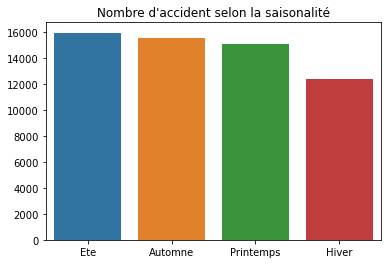

In [14]:
df_saison_accident = pd.DataFrame(data_dep["Saison"].value_counts()).T
df_saison_accident

sns.barplot(data=df_saison_accident).set_title("Nombre d'accident selon la saisonalité")

In [15]:
df_accident_jour = pd.DataFrame(data_dep["Date"].value_counts())
df_accident_jour.reset_index(drop=False, inplace=True)
df_accident_jour = df_accident_jour.sort_values(by="index", ascending=True)
df_accident_jour

,index,Date
355,2019-01-01,105
351,2019-01-02,107
350,2019-01-03,109
301,2019-01-04,133
356,2019-01-05,103
...,...,...
336,2019-12-27,118
338,2019-12-28,117
352,2019-12-29,107
321,2019-12-30,125


No handles with labels found to put in legend.


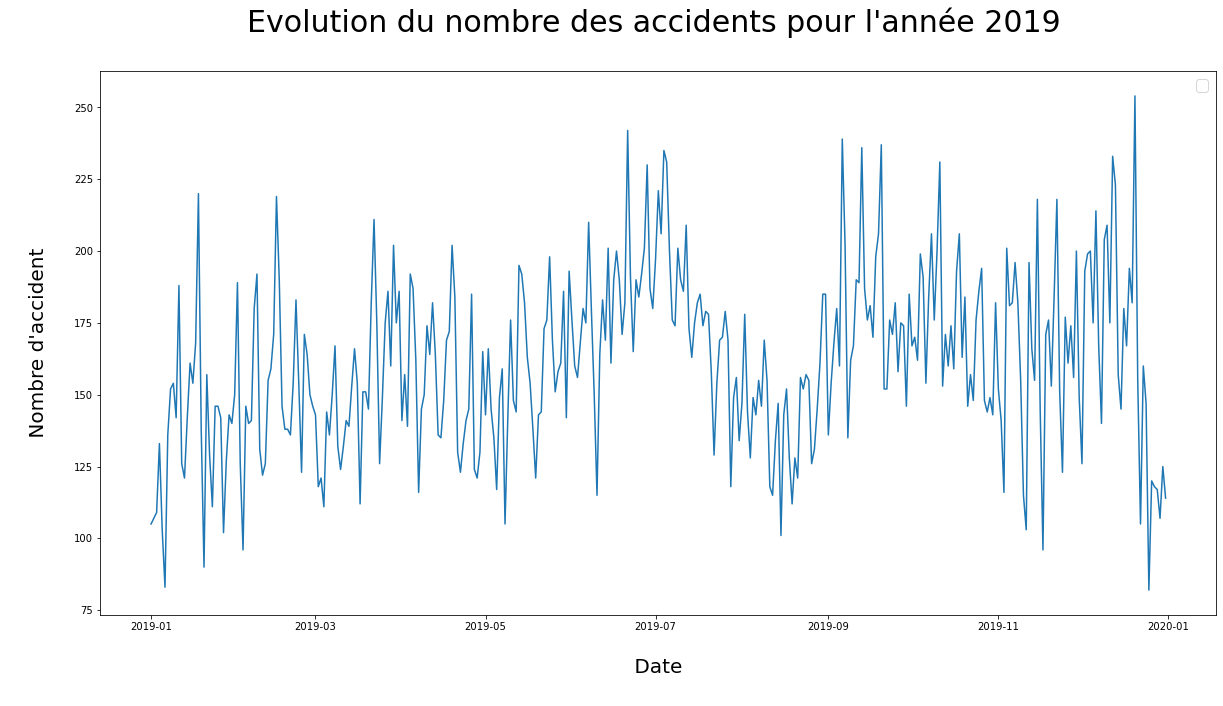

In [16]:
plt.figure(figsize=(20,10))
plt.plot(df_accident_jour["index"], df_accident_jour["Date"])
plt.xlabel('\n Date \n', fontsize=20)
plt.ylabel('\n Nombre d\'accident \n', fontsize=20)
plt.title("Evolution du nombre des accidents pour l'année 2019 \n", loc='center', fontsize = 30)
plt.legend(fontsize=16)